In [1]:
## processing
import numpy as np
import pandas as pd

## custom package
import tregs

## visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Arial"

# pboc plotting style
tregs.mpl_pboc.plotting_style()

{'green': '#7AA974',
 'light_green': '#BFD598',
 'pale_green': '#DCECCB',
 'yellow': '#EAC264',
 'light_yellow': '#F3DAA9',
 'pale_yellow': '#FFEDCE',
 'blue': '#738FC1',
 'light_blue': '#A9BFE3',
 'pale_blue': '#C9D7EE',
 'red': '#D56C55',
 'light_red': '#E8B19D',
 'pale_red': '#F1D4C9',
 'purple': '#AB85AC',
 'light_purple': '#D4C2D9',
 'dark_green': '#7E9D90',
 'dark_brown': '#905426'}

## Loading and processing sequencing data

In [2]:
fpath = '../data/ykgE_dataset_combined.csv'
df_ykgE = pd.read_csv(fpath)
df_ykgE.head()

,ct,ct_0,ct_1,seq
0,1.0,1.0,0.0,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
1,1.0,1.0,0.0,ACGAATTCCCCATAAGAAGTAAGCGATGCAGAAAGAAATAAAATTA...
2,1.0,1.0,0.0,ACGAATTCCCCATAAGAAGTAAGCGATGCAGAAAGAAATAAAATTA...
3,2.0,2.0,0.0,ACGACTTGCCCAATAAATGTGAGCGTTGCCAAAAGGAATACAATGA...
4,2.0,2.0,0.0,ACGACTTGCCCAATAAATGTGAGCGTTGCCAAAAGGAATACAATGA...


In [3]:
def trim_seqs(row):
    return row['seq'][:160]

df_ykgE['seq'] = df_ykgE.apply(trim_seqs, axis=1)
df_ykgE = df_ykgE[df_ykgE.ct_0 != 0.0]
df_ykgE['norm_ct_1'] = df_ykgE['ct_1'] / df_ykgE['ct_0']
df_ykgE.head()

,ct,ct_0,ct_1,seq,norm_ct_1
0,1.0,1.0,0.0,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,0.0
1,1.0,1.0,0.0,ACGAATTCCCCATAAGAAGTAAGCGATGCAGAAAGAAATAAAATTA...,0.0
2,1.0,1.0,0.0,ACGAATTCCCCATAAGAAGTAAGCGATGCAGAAAGAAATAAAATTA...,0.0
3,2.0,2.0,0.0,ACGACTTGCCCAATAAATGTGAGCGTTGCCAAAAGGAATACAATGA...,0.0
4,2.0,2.0,0.0,ACGACTTGCCCAATAAATGTGAGCGTTGCCAAAAGGAATACAATGA...,0.0


## Calculating expression shift

In [4]:
wtseq = 'TCGATTTCCCCATAAAATGTGAGCGATGCCGAAAGAAATAAAATTAGTTATTGCATTTGACGTTTGGATGAAAGATTATCATTTGTCATACAAATGAGGGGTGGTATGTTGCTAGCCAATTAAAAAAGAACGCCATATTTATTGATGATTGATCCCCCGG'

In [5]:
mut_list = df_ykgE['seq'].values
mu_data = df_ykgE['norm_ct_1'].values

In [6]:
windowsize=3
exshift_list = tregs.footprint.get_expression_shift(mut_list, mu_data, wtseq, smoothed=True, windowsize=windowsize)

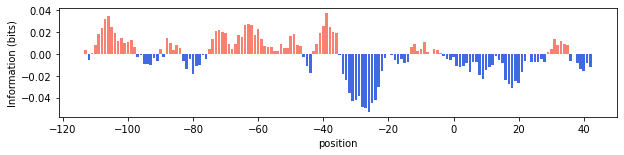

In [7]:
fig, ax = plt.subplots(figsize=(10,2))
ax.set_ylabel('Information (bits)')
ax.set_xlabel('position')

cut = int((windowsize - 1) / 2)
x = np.arange(-115 + cut, 45 - cut)
shiftcolors = [('salmon' if exshift > 0 else 'royalblue') for exshift in exshift_list]
ax.bar(x, exshift_list, edgecolor=None, color=shiftcolors)
plt.show()

## Testing on simulated lacI data

In [4]:
fpath = '../../data/synthetic_datasets/lacI_synthetic_dataset.csv'
df_lacI = pd.read_csv(fpath)
df_lacI.head()

,seq,pbound,ct_0,ct_1,ct
0,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.006575,3.0,2.0,5.0
1,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.055688,2.0,12.0,14.0
2,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.253632,9.0,229.0,238.0
3,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.006162,7.0,5.0,12.0
4,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.021258,4.0,9.0,13.0


In [6]:
wtseq[95:]

'CCGGCTCGTATGTTGTGTGGAATTGTGAGCGGATAACAATTTCACACAGGAAACAGCTATGACCA'

In [2]:
wtseq = 'ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGAATTGTGAGCGGATAACAATTTCACACAGGAAACAGCTATGACCA'

In [6]:
df_lacI = df_lacI[df_lacI.ct_0 != 0.0]
df_lacI['norm_ct_1'] = df_lacI['ct_1'] / df_lacI['ct_0']

n_seqs = len(df_lacI)
mut_list = df_lacI['seq'].values
mu_data = df_lacI['norm_ct_1'].values

In [7]:
windowsize=5
exshift_list = tregs.footprint.get_expression_shift(mut_list, mu_data, wtseq, smoothed=True, windowsize=windowsize)

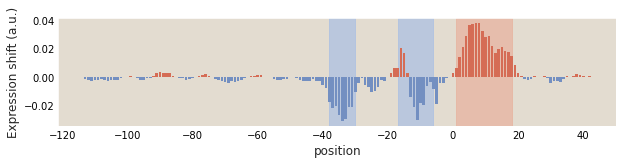

In [21]:
fig, ax = plt.subplots(figsize=(10,2))

ax.axvspan(76 - 114, 84 - 114, alpha=0.7, color='#A9BFE3')
ax.axvspan(97 - 114, 108 - 114, alpha=0.7, color='#A9BFE3')
ax.axvspan(115 - 114, 132 - 114, alpha=0.7, color='#E8B19D')

cut = int((windowsize - 1) / 2)
x = np.arange(-115 + cut, 45 - cut)
shiftcolors = [('#D56C55' if exshift > 0 else '#738FC1') for exshift in exshift_list]
ax.bar(x, exshift_list, color=shiftcolors, edgecolor=None, linewidth=0)

ax.set_ylabel('Expression shift (a.u.)', fontsize=12)
ax.set_xlabel('position', fontsize=12)
plt.show()

where are the "canonical" -10 and -35 RNAP binding sites?